In [46]:
!pip install qiskit

In [47]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex

In [48]:
psi_0 = qi.Statevector([0,1,0,0]) 
psi_0.draw('latex')

<IPython.core.display.Latex object>

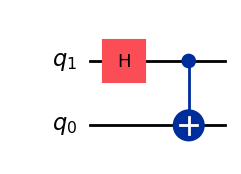

In [49]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.draw(output='mpl',reverse_bits=True)

In [50]:
psi_1=psi_0.evolve(qc)
psi_1.draw('latex')

<IPython.core.display.Latex object>

In [51]:
Q1=qi.DensityMatrix(psi_1)
Q1.draw('latex')

<IPython.core.display.Latex object>

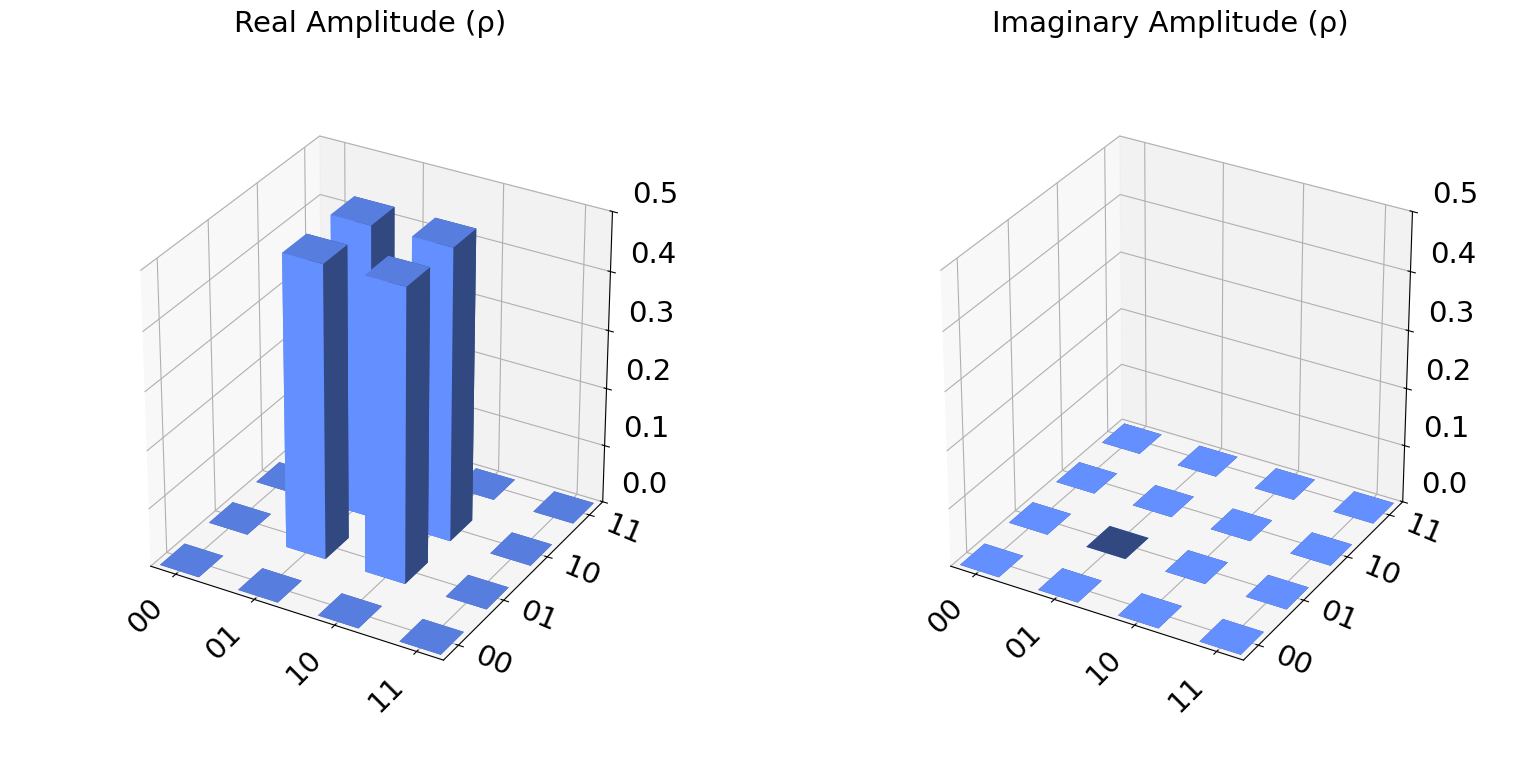

In [52]:
Q1.draw('city')

In [53]:
Q2 = qi.DensityMatrix.from_label('l')
Q2.draw('latex')

<IPython.core.display.Latex object>

In [54]:
S = qi.Operator.from_label('S')
S.draw('latex')

<IPython.core.display.Latex object>

In [55]:
# Density Matrix of a mixed state 
Q3= 1/3*qi.DensityMatrix.from_label('0')+2/3*qi.DensityMatrix.from_label('1')
Q3.draw('latex')

<IPython.core.display.Latex object>

### Density Matrix from Noisy Circuits 

In [56]:
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, mixed_unitary_error

In [57]:
l = qi.DensityMatrix.from_label('l')
r = qi.DensityMatrix.from_label('r')
p = qi.DensityMatrix.from_label('+')

Q4 = 8/10*r + 1/10*l + 1/10*p
Q4.draw('latex')

<IPython.core.display.Latex object>

In [58]:
S = qi.Operator.from_label('S')
Sdg = S.adjoint()
I = qi.Operator.from_label('I')

prob_S = 0.8
prob_Sdg = 0.1
prob_I = 0.1

S_noisy = mixed_unitary_error([(S,prob_S),(Sdg,prob_Sdg),(I,prob_I)])
print(S_noisy)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8, Circuit = 
   ┌─────────┐
q: ┤ Unitary ├
   └─────────┘
  P(1) = 0.1, Circuit = 
   ┌─────────┐
q: ┤ Unitary ├
   └─────────┘
  P(2) = 0.1, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [59]:
noise_m = NoiseModel()
noise_m.add_quantum_error(S_noisy,['id'],[0])
print(noise_m)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  Qubits with noise: [0]
  Specific qubit errors: [('id', (0,))]


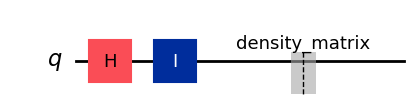

In [60]:
qc = QuantumCircuit(1)
qc.h(0)
qc.id(0)
qc.save_density_matrix()
qc.draw(output='mpl')

In [61]:
sim_density = AerSimulator(noise_model = noise_m)
job = sim_density.run(qc)
result = job.result().data()
Q5 = result.get('density_matrix')

In [62]:
Q5.draw('latex')

<IPython.core.display.Latex object>

### Density matrix and Mixed States and State Purity 

In [63]:
import sympy as sp

In [92]:
# number of qubits
n =2

In [93]:
alphas = [sp.Symbol('a'+str(i)) for i in range(2**n)]
alphas

[a0, a1, a2, a3]

In [94]:
psi_ket = sp.Matrix(alphas)
psi_ket 

Matrix([
[a0],
[a1],
[a2],
[a3]])

In [95]:
psi_bra = psi_ket.transpose().conjugate()
psi_bra

Matrix([[conjugate(a0), conjugate(a1), conjugate(a2), conjugate(a3)]])

In [96]:
alpha_stars = [sp.Symbol('a'+str(i)+'^*') for i in range(2**n)]
alpha_stars

[a0^*, a1^*, a2^*, a3^*]

In [97]:
psi_bra = sp.Matrix(alpha_stars).transpose()
psi_bra

Matrix([[a0^*, a1^*, a2^*, a3^*]])

In [98]:
Q6 = psi_ket @ psi_bra
Q6

Matrix([
[a0*a0^*, a0*a1^*, a0*a2^*, a0*a3^*],
[a0^**a1, a1*a1^*, a1*a2^*, a1*a3^*],
[a0^**a2, a1^**a2, a2*a2^*, a2*a3^*],
[a0^**a3, a1^**a3, a2^**a3, a3*a3^*]])

In [99]:
Q6_sqr = Q6**2
Q6_sqr

Matrix([
[a0**2*a0^***2 + a0*a0^**a1*a1^* + a0*a0^**a2*a2^* + a0*a0^**a3*a3^*, a0**2*a0^**a1^* + a0*a1*a1^***2 + a0*a1^**a2*a2^* + a0*a1^**a3*a3^*, a0**2*a0^**a2^* + a0*a1*a1^**a2^* + a0*a2*a2^***2 + a0*a2^**a3*a3^*, a0**2*a0^**a3^* + a0*a1*a1^**a3^* + a0*a2*a2^**a3^* + a0*a3*a3^***2],
[a0*a0^***2*a1 + a0^**a1**2*a1^* + a0^**a1*a2*a2^* + a0^**a1*a3*a3^*, a0*a0^**a1*a1^* + a1**2*a1^***2 + a1*a1^**a2*a2^* + a1*a1^**a3*a3^*, a0*a0^**a1*a2^* + a1**2*a1^**a2^* + a1*a2*a2^***2 + a1*a2^**a3*a3^*, a0*a0^**a1*a3^* + a1**2*a1^**a3^* + a1*a2*a2^**a3^* + a1*a3*a3^***2],
[a0*a0^***2*a2 + a0^**a1*a1^**a2 + a0^**a2**2*a2^* + a0^**a2*a3*a3^*, a0*a0^**a1^**a2 + a1*a1^***2*a2 + a1^**a2**2*a2^* + a1^**a2*a3*a3^*, a0*a0^**a2*a2^* + a1*a1^**a2*a2^* + a2**2*a2^***2 + a2*a2^**a3*a3^*, a0*a0^**a2*a3^* + a1*a1^**a2*a3^* + a2**2*a2^**a3^* + a2*a3*a3^***2],
[a0*a0^***2*a3 + a0^**a1*a1^**a3 + a0^**a2*a2^**a3 + a0^**a3**2*a3^*, a0*a0^**a1^**a3 + a1*a1^***2*a3 + a1^**a2*a2^**a3 + a1^**a3**2*a3^*, a0*a0^**a2^**a3 + 

In [100]:
for i, coefs in enumerate(zip(alphas,alpha_stars)):
    Q6_sqr = Q6_sqr.subs(coefs[0]*coefs[1],'p'+str(i))

Q6_sqr

Matrix([
[                    p0**2 + p0*p1 + p0*p2 + p0*p3, a0*a1^**p0 + a0*a1^**p1 + a0*a1^**p2 + a0*a1^**p3, a0*a2^**p0 + a0*a2^**p1 + a0*a2^**p2 + a0*a2^**p3, a0*a3^**p0 + a0*a3^**p1 + a0*a3^**p2 + a0*a3^**p3],
[a0^**a1*p0 + a0^**a1*p1 + a0^**a1*p2 + a0^**a1*p3,                     p0*p1 + p1**2 + p1*p2 + p1*p3, a1*a2^**p0 + a1*a2^**p1 + a1*a2^**p2 + a1*a2^**p3, a1*a3^**p0 + a1*a3^**p1 + a1*a3^**p2 + a1*a3^**p3],
[a0^**a2*p0 + a0^**a2*p1 + a0^**a2*p2 + a0^**a2*p3, a1^**a2*p0 + a1^**a2*p1 + a1^**a2*p2 + a1^**a2*p3,                     p0*p2 + p1*p2 + p2**2 + p2*p3, a2*a3^**p0 + a2*a3^**p1 + a2*a3^**p2 + a2*a3^**p3],
[a0^**a3*p0 + a0^**a3*p1 + a0^**a3*p2 + a0^**a3*p3, a1^**a3*p0 + a1^**a3*p1 + a1^**a3*p2 + a1^**a3*p3, a2^**a3*p0 + a2^**a3*p1 + a2^**a3*p2 + a2^**a3*p3,                     p0*p3 + p1*p3 + p2*p3 + p3**2]])

In [101]:
gamma = sp.simplify(sp.Trace(Q6_sqr))
gamma

p0*(p0 + p1 + p2 + p3) + p1*(p0 + p1 + p2 + p3) + p2*(p0 + p1 + p2 + p3) + p3*(p0 + p1 + p2 + p3)

In [102]:
sp.expand(gamma)

p0**2 + 2*p0*p1 + 2*p0*p2 + 2*p0*p3 + p1**2 + 2*p1*p2 + 2*p1*p3 + p2**2 + 2*p2*p3 + p3**2

In [103]:
sp.factor(gamma)

(p0 + p1 + p2 + p3)**2

### Purity in pure and mixed states

In [104]:
import numpy as np
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

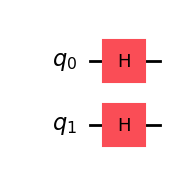

In [106]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.draw(output='mpl')

In [108]:
psi_h = qi.Statevector(qc)
psi_h.draw('latex')

<IPython.core.display.Latex object>

This generates equal superposition of all possible eigenstates.

In [110]:
Q_h = qi.DensityMatrix(qc)
Q_h.draw('latex')

<IPython.core.display.Latex object>

In [111]:
qi.purity(Q_h)

(0.9999999999999994+0j)

In [113]:
# Density Matrix for that completely mixed state 
Q_c = 1/4*(qi.DensityMatrix.from_label('00')
           + qi.DensityMatrix.from_label('01')
           + qi.DensityMatrix.from_label('10')
           + qi.DensityMatrix.from_label('11'))

Q_c.draw('latex')

<IPython.core.display.Latex object>

In [114]:
qi.purity(Q_c)

(0.25+0j)

In [116]:
elems = 1/8*np.ones((4,4))
np.fill_diagonal(elems,1/4)
Q_m1 = qi.DensityMatrix(elems)
Q_m1.draw('latex')

<IPython.core.display.Latex object>

Here we created a matrix with all diagonal elements = 1/4 and off diagonal elements to be 1/8.

In [117]:
qi.purity(Q_m1)

(0.4375+0j)

In [118]:
elems = 1/16*np.ones((4,4))
np.fill_diagonal(elems,1/4)
Q_m2 = qi.DensityMatrix(elems)
Q_m2.draw('latex')

<IPython.core.display.Latex object>

In [119]:
qi.purity(Q_m2)

(0.296875+0j)

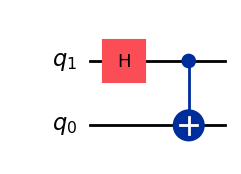

In [120]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.draw(output='mpl',reverse_bits=True)

In [122]:
phi_p = qi.Statevector(qc)
phi_p.draw('latex')

<IPython.core.display.Latex object>

In [123]:
Q_p = qi.DensityMatrix(phi_p)
Q_p.draw('latex')

<IPython.core.display.Latex object>

In [124]:
qi.purity(Q_p)

(0.9999999999999996+0j)

The idea is that for any pure state the purity is 1.

In [125]:
Q_m3 = 1/2*qi.DensityMatrix.from_label('00')+1/2*qi.DensityMatrix.from_label('11')
Q_m3.draw('latex')

<IPython.core.display.Latex object>

In [126]:
qi.purity(Q_m3)

(0.5+0j)

In [127]:
Q_c.draw('latex')

<IPython.core.display.Latex object>

In [128]:
qi.purity(Q_c)

(0.25+0j)

### Reduced Density Matrix

In [129]:
from math import sqrt

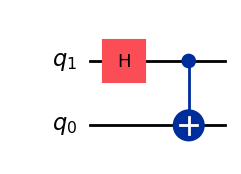

In [130]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.draw(output='mpl',reverse_bits=True)

In [131]:
Q_AB = qi.DensityMatrix(qc)
Q_AB.draw('latex')

<IPython.core.display.Latex object>

In [133]:
Q_B = qi.partial_trace(Q_AB,[1])
Q_B.draw('latex')

<IPython.core.display.Latex object>

In [134]:
Q_A = qi.partial_trace(Q_AB,[1])
Q_A.draw('latex')

<IPython.core.display.Latex object>

In [135]:
zeta = 1/sqrt(3)*qi.Statevector([0,1,1,0,1,0,0,0])
zeta.draw('latex')

<IPython.core.display.Latex object>

In [136]:
omega = qi.DensityMatrix(zeta)
omega.draw('latex')

<IPython.core.display.Latex object>

In [137]:
omega_B = qi.partial_trace(omega,[0,1])
omega_B.draw('latex')

<IPython.core.display.Latex object>

In [138]:
omega_A = qi.partial_trace(omega,[2])
omega_A.draw('latex')

<IPython.core.display.Latex object>

### Pauli String Decomposition of Density Matrices

In [140]:
Q8 = sp.Matrix([[7/10,2/5-1/10*sp.I],[2/5+1/10*sp.I,3/10]])
Q8

Matrix([
[        0.7, 0.4 - 0.1*I],
[0.4 + 0.1*I,         0.3]])

In [141]:
Q8_dag = Q8.transpose().conjugate()
Q8_dag

Matrix([
[        0.7, 0.4 - 0.1*I],
[0.4 + 0.1*I,         0.3]])

In [153]:
I = sp.Matrix([[1,0],[0,1]])
X = sp.Matrix([[0,1],[1,0]])
Y = sp.Matrix([[0,-sp.I],[sp.I,0]])
Z = sp.Matrix([[1,0],[0,-1]])

In [155]:
a0 = sp.simplify(sp.Trace(Q8_dag @I))
a0

1.00000000000000

In [156]:
a1 = sp.simplify(sp.Trace(Q8_dag @X))
a1

0.800000000000000

In [157]:
a2 = sp.simplify(sp.Trace(Q8_dag @Y))
a2

0.200000000000000

In [158]:
a3 = sp.simplify(sp.Trace(Q8_dag @Z))
a3

0.400000000000000

In [159]:
Q_2 = 1/2*(a0*I +a1*X +a2*Y +a3*Z)
Q_2

Matrix([
[        0.7, 0.4 - 0.1*I],
[0.4 + 0.1*I,         0.3]])

In [160]:
from qiskit.quantum_info import Statevector, DensityMatrix, SparsePauliOp

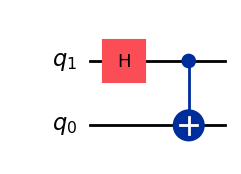

In [164]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.draw(output='mpl',reverse_bits = True)

In [165]:
Q9 = DensityMatrix(qc)
Q9.draw('latex')

<IPython.core.display.Latex object>

In [166]:
SparsePauliOp.from_operator(Q9)

SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])

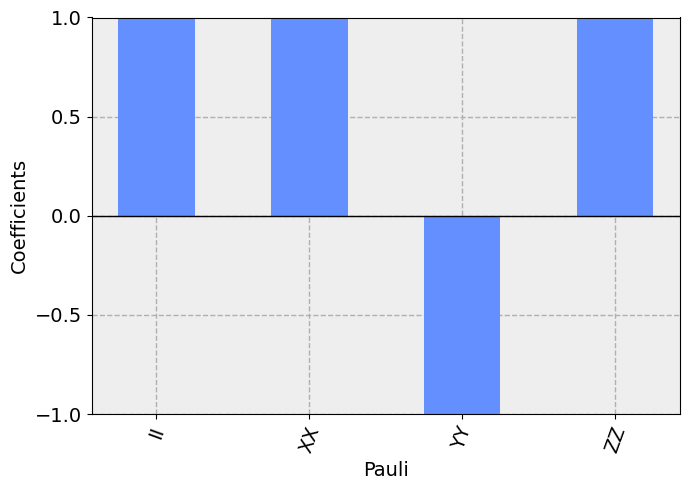

In [167]:
Q9.draw('paulivec')

In [168]:
zeta = 1/sqrt(3)*qi.Statevector([0,1,1,0,1,0,0,0])
zeta.draw('latex')

<IPython.core.display.Latex object>

In [169]:
Q10 = DensityMatrix(zeta)
Q10.draw('latex')

<IPython.core.display.Latex object>

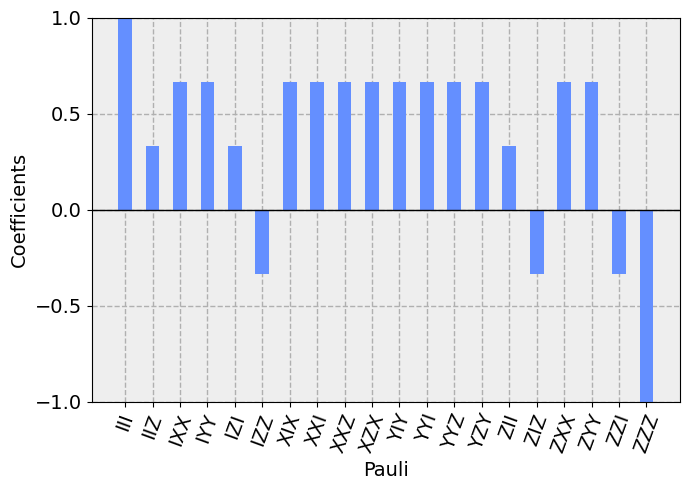

In [170]:
Q10.draw('paulivec')

In [172]:
SparsePauliOp.from_operator(Q10)

SparsePauliOp(['III', 'IIZ', 'IXX', 'IYY', 'IZI', 'IZZ', 'XIX', 'XXI', 'XXZ', 'XZX', 'YIY', 'YYI', 'YYZ', 'YZY', 'ZII', 'ZIZ', 'ZXX', 'ZYY', 'ZZI', 'ZZZ'],
              coeffs=[ 0.125     +0.j,  0.04166667+0.j,  0.08333333+0.j,  0.08333333-0.j,
  0.04166667+0.j, -0.04166667+0.j,  0.08333333+0.j,  0.08333333+0.j,
  0.08333333+0.j,  0.08333333+0.j,  0.08333333-0.j,  0.08333333-0.j,
  0.08333333-0.j,  0.08333333-0.j,  0.04166667+0.j, -0.04166667+0.j,
  0.08333333+0.j,  0.08333333-0.j, -0.04166667+0.j, -0.125     +0.j])

### Evolving the Density Matrix 

In [173]:
Q_1 = 1/3*DensityMatrix.from_label('0')+2/3*DensityMatrix.from_label('-')
Q_1.draw('latex')

<IPython.core.display.Latex object>

In [174]:
lambda_s, psi_s = np.linalg.eig(Q_1)

In [175]:
sp.Matrix(lambda_s)

Matrix([
[0.872677996249964],
[0.127322003750035]])

In [176]:
sum(lambda_s)

(0.9999999999999994+0j)

In [177]:
sp.Matrix(psi_s)

Matrix([
[  0.85065080835204, 0.525731112119133],
[-0.525731112119133,  0.85065080835204]])

In [178]:
lambda_s, psi_s = np.linalg.eig(Q_1)
psi_s = np.transpose(psi_s)

In [179]:
for i, state in enumerate(psi_s):
    if i == 0:
        Q_recon = lambda_s[i]*DensityMatrix(state)
    else:
        Q_recon += lambda_s[i]*DensityMatrix(state)

print("original Q:")
display(Q_1)
print("reconstructed Q:")
display(Q_recon)

original Q:
DensityMatrix([[ 0.66666667+0.j, -0.33333333+0.j],
               [-0.33333333+0.j,  0.33333333+0.j]],
              dims=(2,))
reconstructed Q:
DensityMatrix([[ 0.66666667+0.j, -0.33333333+0.j],
               [-0.33333333+0.j,  0.33333333+0.j]],
              dims=(2,))


In [180]:
from qiskit import QuantumCircuit, transpile 
from qiskit.quantum_info import random_density_matrix
from qiskit.visualization import plot_histogram 
from qiskit_aer import AerSimulator

In [181]:
n = 3
Q = random_density_matrix(2**n)

lambda_s, psi_s = np.linalg.eig(Q)
psi_s = np.transpose(psi_s)

for i, state in enumerate(psi_s):
    if i == 0:
        Q_recon = lambda_s[i]*DensityMatrix(state)
    else:
        Q_recon += lambda_s[i]*DensityMatrix(state)

print("original Q:")
display(Q)
print("reconstructed Q:")
display(Q_recon)


original Q:
DensityMatrix([[ 0.10507344-7.35926077e-19j,  0.00658635+1.90281502e-03j,
                -0.03689093-1.74011147e-03j, -0.05275693+4.06771841e-02j,
                 0.00144174-1.95973717e-02j,  0.02214041-2.48911329e-02j,
                -0.02094551-2.61549378e-02j, -0.04414301-3.49209228e-02j],
               [ 0.00658635-1.90281502e-03j,  0.12869868-3.52562760e-19j,
                -0.01262316+5.52231253e-02j, -0.03267458+1.40345781e-02j,
                 0.0282022 +8.94012309e-04j,  0.012441  +5.49335739e-02j,
                 0.01543344-3.65613760e-03j, -0.01955417+3.77981413e-02j],
               [-0.03689093+1.74011147e-03j, -0.01262316-5.52231253e-02j,
                 0.13567894-2.67445733e-18j,  0.02096581-1.40556120e-02j,
                -0.00866603-2.71796279e-02j,  0.05204083-3.84611324e-02j,
                -0.01233189+2.80924599e-02j,  0.02905704+2.83507666e-02j],
               [-0.05275693-4.06771841e-02j, -0.03267458-1.40345781e-02j,
                 0.0209

In [182]:
def ghz(n):
    qc = QuantumCircuit(n)
    qc.h(n-1)
    for qb in reversed(range(1,n)):
        qc.cx(qb,qb-1)

    return qc

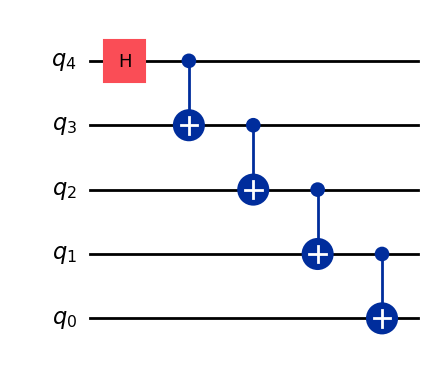

In [184]:
qc = ghz(5)
qc.draw(output='mpl',reverse_bits=True)

In [187]:
qc = ghz(n)
Q_evolved = Q.evolve(qc)

samples = 4096
qinfo_counts= Q_evolved.sample_counts(samples)

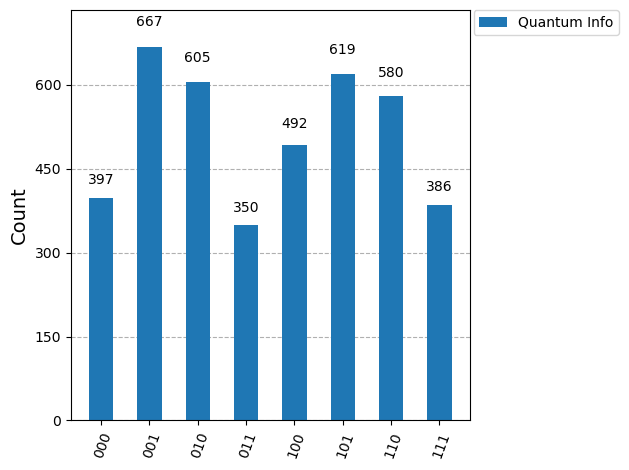

In [188]:
plot_histogram([qinfo_counts], legend=['Quantum Info'])

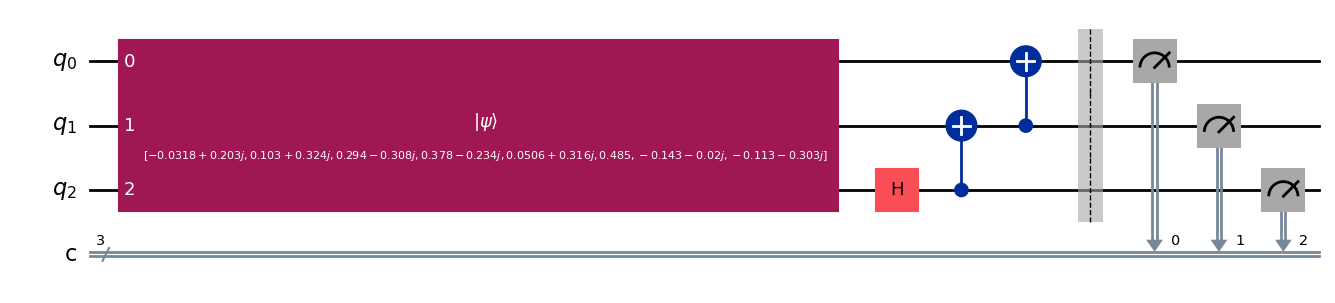

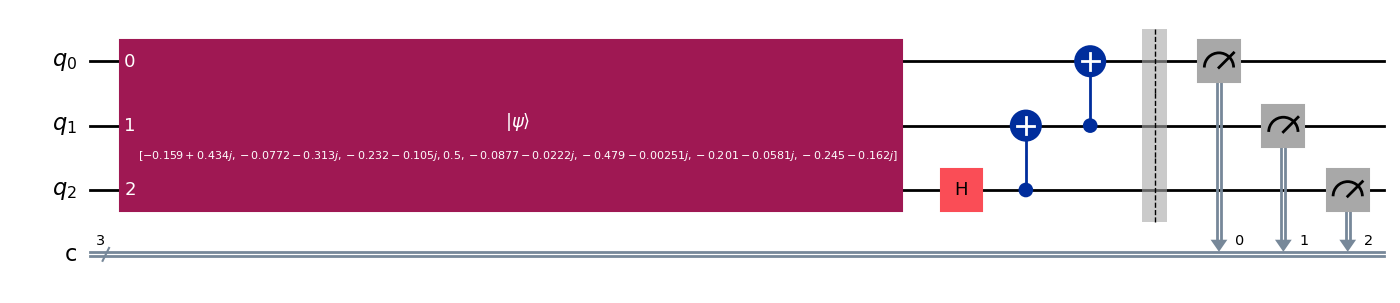

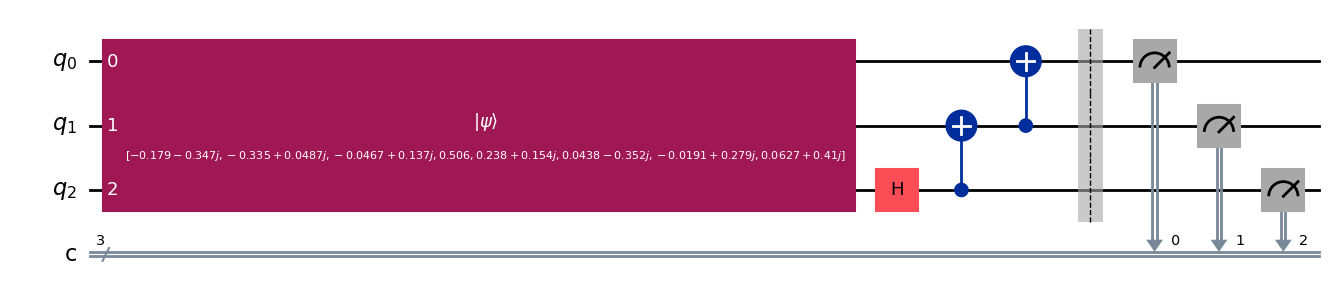

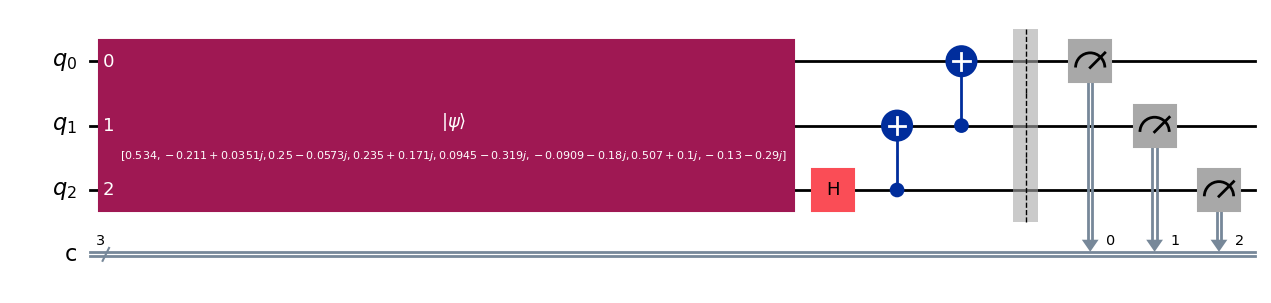

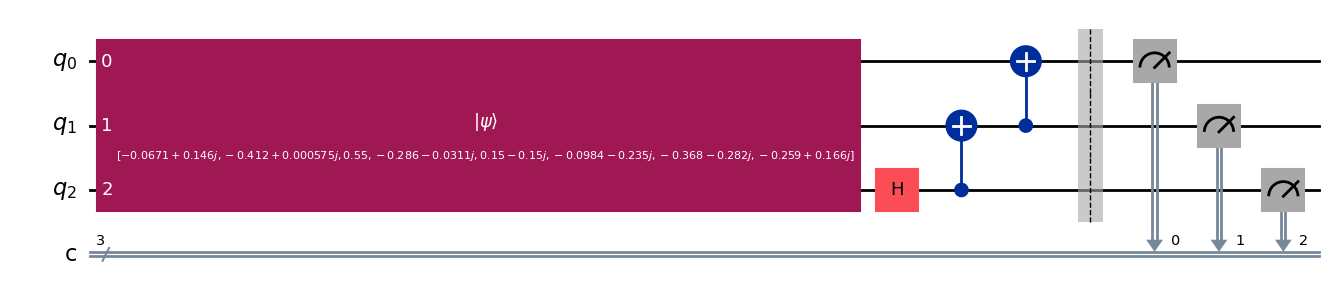

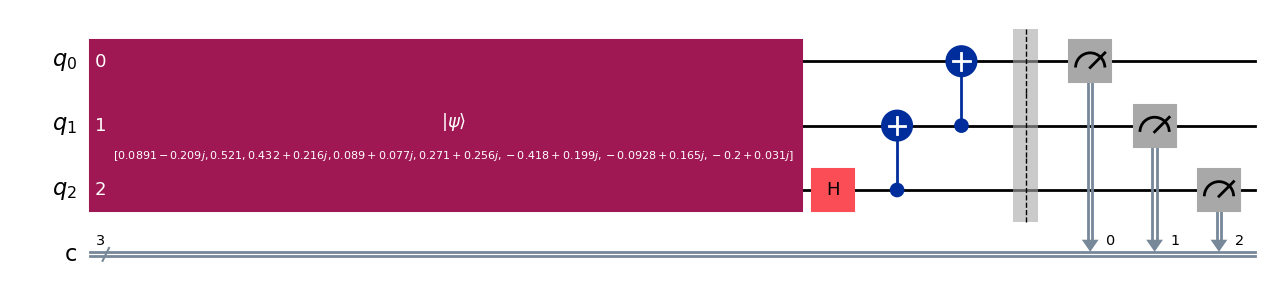

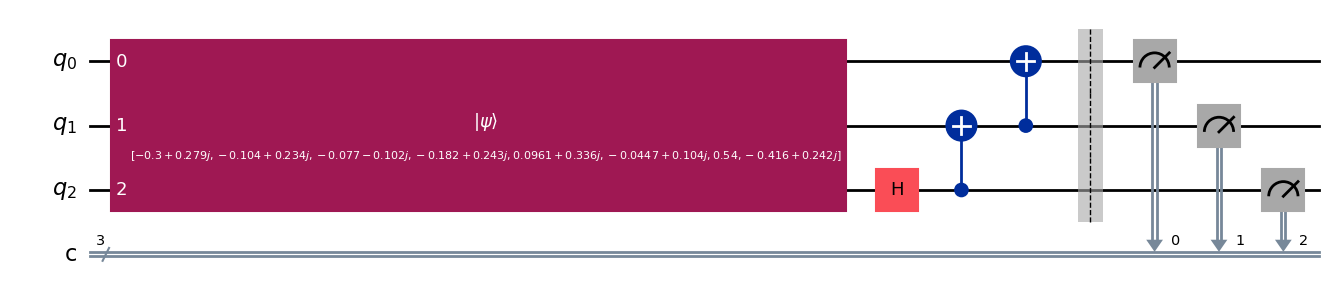

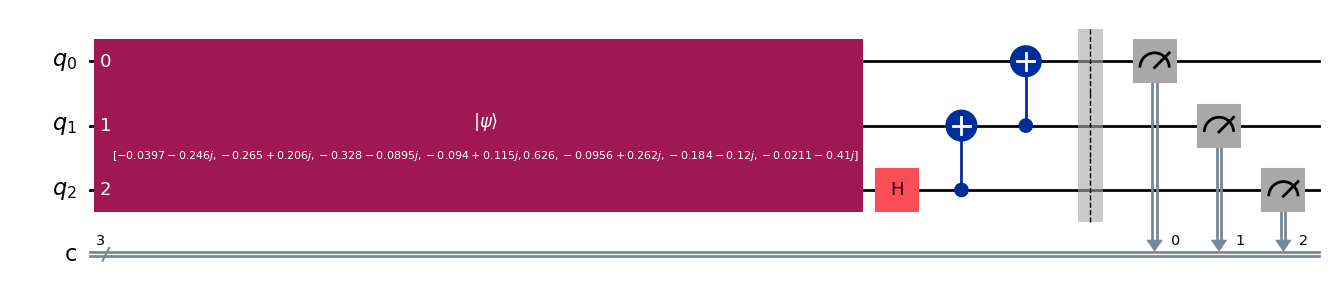

In [190]:
circuits = []

for state in psi_s:
    qc = QuantumCircuit(n,n)
    qc.initialize(state)
    qc.compose(ghz(n), range(n), inplace = True)
    qc.barrier()
    qc.measure(range(n), range(n))
    display(qc.draw(output='mpl'))
    circuits.append(qc)

In [191]:
backend = AerSimulator()
trans_circuits=[]

for circ in circuits:
    trans_qc = transpile(circ, backend=backend)
    trans_circuits.append(trans_qc)

In [195]:
indices = np.random.choice(range(2**n),size=samples, p=np.real(lambda_s))

for index in indices:
    result = backend.run(trans_circuits[index], shots = 1, memory = True).result()
    output = result.get_memory()
    print(output)

['100']
['101']
['101']
['011']
['001']
['100']
['101']
['111']
['010']
['011']
['000']
['110']
['011']
['100']
['001']
['000']
['110']
['110']
['101']
['111']
['011']
['000']
['111']
['101']
['010']
['001']
['101']
['101']
['100']
['001']
['010']
['001']
['001']
['110']
['101']
['111']
['010']
['101']
['001']
['001']
['110']
['101']
['010']
['100']
['111']
['001']
['011']
['010']
['100']
['101']
['101']
['110']
['010']
['001']
['111']
['010']
['001']
['011']
['001']
['110']
['100']
['101']
['011']
['100']
['011']
['000']
['001']
['001']
['101']
['001']
['111']
['000']
['101']
['011']
['010']
['110']
['110']
['001']
['100']
['101']
['110']
['000']
['010']
['111']
['011']
['110']
['010']
['000']
['010']
['000']
['011']
['100']
['010']
['101']
['100']
['100']
['011']
['101']
['100']
['111']
['101']
['010']
['011']
['001']
['010']
['101']
['010']
['100']
['101']
['101']
['110']
['100']
['111']
['001']
['110']
['011']
['111']
['100']
['000']
['001']
['111']
['101']
['011']
['101']
['001']


In [198]:
indices = np.random.choice(range(2**n),size=samples, p=np.real(lambda_s))

for index in [0,1,1,3,4]:
    result = backend.run(trans_circuits[index], shots = 1, memory = True).result()
    output = result.get_memory()
    print(output)

['001']
['011']
['000']
['011']
['100']
